# Dataset Context and Exploration

**age**  
- Demographic: Age  
- Description: How old is this sample of people  
- Data Type: Integer  
- Missing Values: No  

**workclass**  
- Demographic: Income  
- Description: Employment classification  
- Possible values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked  
- Data Type: Categorical  
- Missing Values: Yes  

**fnlwgt**  
- Demographic:  
- Description: Final weight representing the number of people the census believes the entry represents  
- Data Type: Integer  
- Missing Values: No  

**education**  
- Demographic: Education Level  
- Description: Highest level of education achieved  
- Possible values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool  
- Data Type: Categorical  
- Missing Values: No  

**education-num**  
- Demographic: Education Level  
- Description: Numeric representation of education level  
- Data Type: Integer  
- Missing Values: No  

**marital-status**  
- Demographic: Other  
- Description: Marital status of the individual  
- Possible values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse  
- Data Type: Categorical  
- Missing Values: No  

**occupation**  
- Demographic: Other  
- Description: Type of job  
- Possible values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces  
- Data Type: Categorical  
- Missing Values: Yes  

**relationship**  
- Demographic: Other  
- Description: Relationship within household  
- Possible values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried  
- Data Type: Categorical  
- Missing Values: No  

**race**  
- Demographic: Race  
- Description: Race of the individual  
- Possible values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black  
- Data Type: Categorical  
- Missing Values: No  

**sex**  
- Demographic: Sex  
- Description: Gender of the individual  
- Possible values: Female, Male  
- Data Type: Binary  
- Missing Values: No  

**capital-gain**  
- Demographic:  
- Description: Income from capital gains  
- Data Type: Integer  
- Missing Values: No  

**capital-loss**  
- Demographic:  
- Description: Capital losses  
- Data Type: Integer  
- Missing Values: No  

**hours-per-week**  
- Demographic:  
- Description: Number of hours worked per week  
- Data Type: Integer  
- Missing Values: No  

**native-country**  
- Demographic: Other  
- Description: Country of origin  
- Possible values: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands  
- Data Type: Categorical  
- Missing Values: Yes  

**income**  
- Demographic: Income  
- Description: Income class  
- Possible values: >50K, <=50K  
- Data Type: Binary  
- Missing Values: No  



In [4]:
import sys
#print(sys.version_info)

try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
except:
    %pip install -U numpy matplotlib pandas seaborn



# Missing Values

In [5]:
df = pd.read_csv('base_data/adultdataset.csv', na_values='NaN', skipinitialspace=True)

#Identify and count the number of missing values in each column, the missing values are repesented by "NaN"
missing_values = df.isna().sum()
print(missing_values)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


# Total fnlwgt

The fnlwgt represent the weight a certain row has over the whole dataset, this works like a percentage.
From this point forward if we discribe something as weighted it means that it weighted to the total fnlwgt

In [6]:
total_fnlwgt = df['fnlwgt'].sum()
print(total_fnlwgt)


9263575662


# Weighted Age Distribution

In [ ]:
age_bins = [(17, 26), (27, 36), (37, 46), (47, 56), (57, 66), (67, 76), (77, 86), (87, 99)]

age_distribution = (df.groupby('age')['fnlwgt'].sum() / total_fnlwgt).to_dict()

# Aggregate into custom age ranges
age_ranges = {}
for start, end in age_bins:
    label = f'{start}-{end}'
    age_ranges[label] = sum(age_distribution.get(age, 0) for age in range(start, end + 1))

print(age_ranges)

# Histogram of age distribution
labels = list(age_ranges.keys())
values = list(age_ranges.values())

plt.figure(figsize=(10, 8))
plt.bar(labels, values, color='skyblue', edgecolor='black')

plt.title('Age Distribution Histogram', fontsize=28)
plt.xlabel('Age Ranges', fontsize=22)
plt.ylabel('Proportion of Population', fontsize=22)
plt.xticks(rotation=30, fontsize=18)
plt.yticks(fontsize=12)

for i, value in enumerate(values):
    plt.text(i, value + 0.002, f'{value:.3f}', ha='center', fontsize=18)

plt.tight_layout()
plt.show()

# Weighted Education Distribution

{'10th': 0.029468504815025498, '11th': 0.03816294386736559, '12th': 0.01400998833877717, '1st-4th': 0.0062664863027056044, '5th-6th': 0.012629909796056028, '7th-8th': 0.019338862285637366, '9th': 0.016240940376528228, 'Assoc-acdm': 0.03347668679083759, 'Assoc-voc': 0.0399183750953639, 'Bachelors': 0.163176883759985, 'Doctorate': 0.011804269538010278, 'HS-grad': 0.32139634430936437, 'Masters': 0.0520525309657691, 'Preschool': 0.0021408804465594703, 'Prof-school': 0.016798332164364632, 'Some-college': 0.22311806114765018}


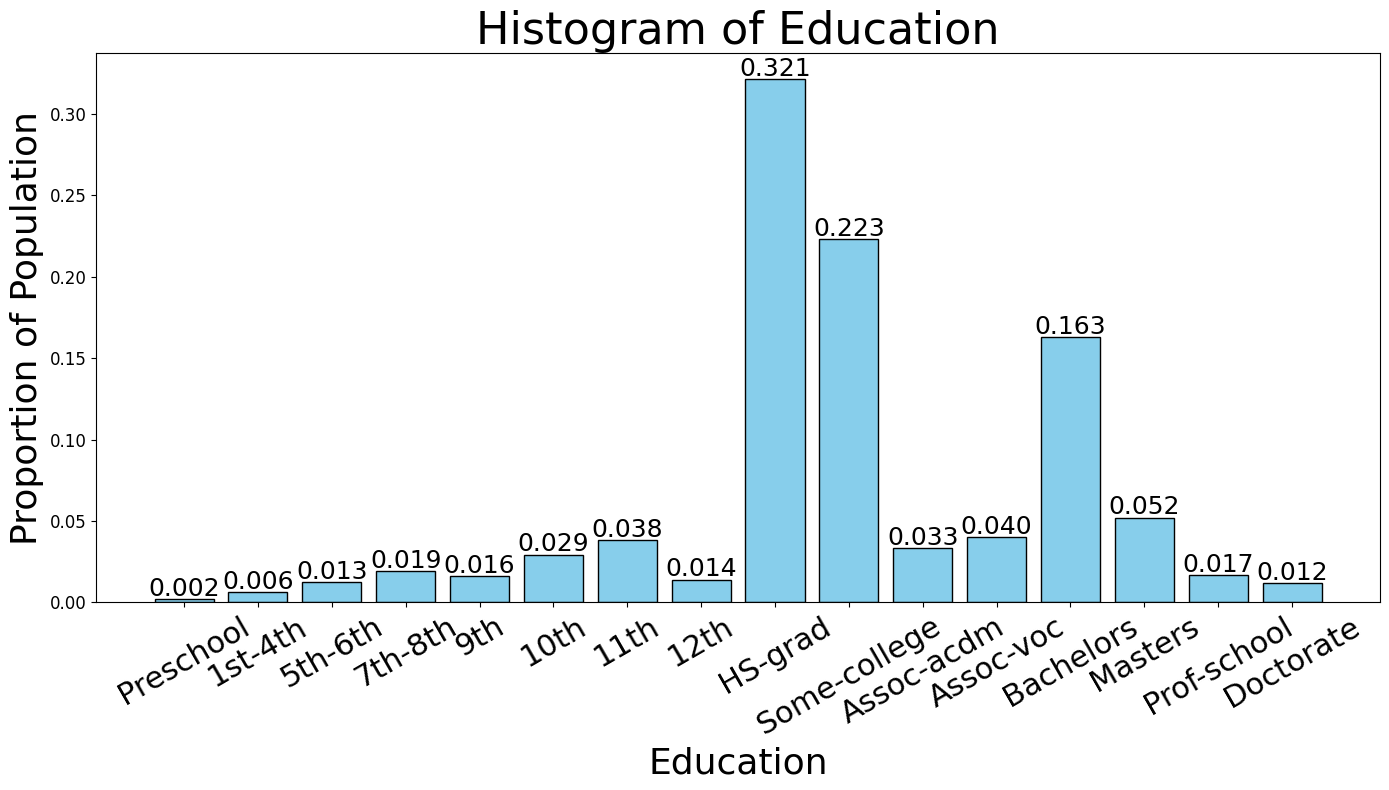

In [49]:

education_distribution = (df.groupby('education')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(education_distribution)

education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc',
    'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
]
labels = [ed for ed in education_order if ed in education_distribution]
values = [education_distribution[ed] for ed in labels]

plt.figure(figsize=(14, 8))
plt.bar(labels, values, color='skyblue', edgecolor='black')
plt.title('Histogram of Education', fontsize=32)
plt.xlabel('Education', fontsize=26)
plt.ylabel('Proportion of Population', fontsize=26)
plt.xticks(rotation=30, fontsize=22)
plt.yticks(fontsize=12)
for i, value in enumerate(values):
    plt.text(i, value + 0.002, f'{value:.3f}', ha='center', fontsize=18)
plt.tight_layout()
plt.show()

# Weighted Race Distribution

{'Amer-Indian-Eskimo': 0.00609399275827926, 'Asian-Pac-Islander': 0.026202793700461278, 'Black': 0.11656649596219383, 'Other': 0.008577742860778288, 'White': 0.8425589747182873}


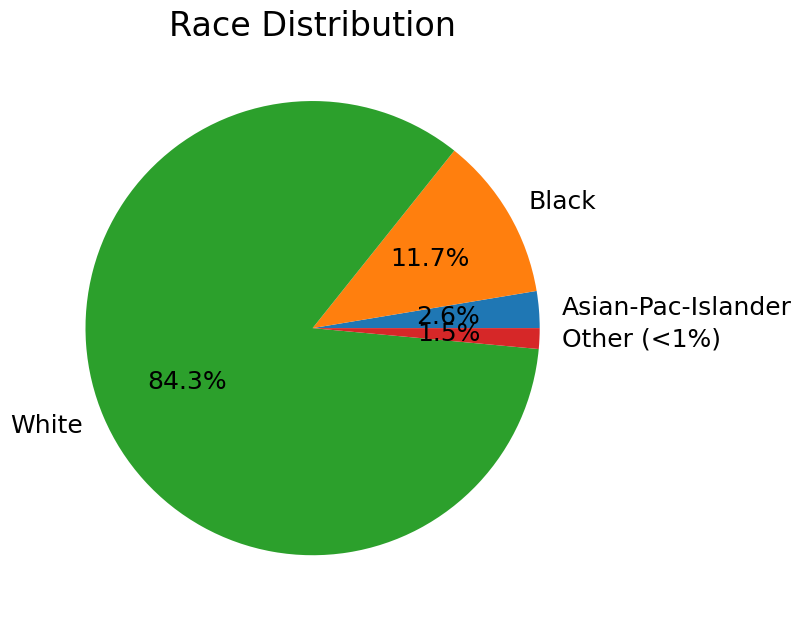

In [51]:

race_distribution = (df.groupby('race')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(race_distribution)

race_labels = []
race_values = []
other = 0
for k, v in race_distribution.items():
    if v < 0.01:
        other += v
    else:
        race_labels.append(k)
        race_values.append(v)
if other > 0:
    race_labels.append('Other (<1%)')
    race_values.append(other)

plt.figure(figsize=(8, 8))
plt.pie(race_values, labels=race_labels, autopct='%1.1f%%', textprops={'fontsize': 18})
plt.title('Race Distribution', fontsize=24)
plt.tight_layout()
plt.show()

# Weighted Native Country Distribuition

{'Cambodia': 0.0006054133095717787, 'Canada': 0.0035612337183499113, 'China': 0.002275493585750992, 'Columbia': 0.001998964619672796, 'Cuba': 0.003584282917470276, 'Dominican-Republic': 0.002264667852399304, 'Ecuador': 0.000867478746135166, 'El-Salvador': 0.004194289701695103, 'England': 0.0025167153430435273, 'France': 0.0007650541495625774, 'Germany': 0.004291807337752816, 'Greece': 0.000795958306925307, 'Guatemala': 0.0024352646130521775, 'Haiti': 0.0017626972128033124, 'Holand-Netherlands': 3.009852892374422e-06, 'Honduras': 0.0005169305217253592, 'Hong': 0.0006895137723332388, 'Hungary': 0.00040688543360871404, 'India': 0.0026994449996861265, 'Iran': 0.0012345983254516651, 'Ireland': 0.000583518308397231, 'Italy': 0.0020298072457196714, 'Jamaica': 0.002418630971181892, 'Japan': 0.0019346626674100781, 'Laos': 0.0005085181113512882, 'Mexico': 0.02920982867446892, 'Nicaragua': 0.0015055085108452585, 'Outlying-US(Guam-USVI-etc)': 0.00046019119997985937, 'Peru': 0.0013488914492551592, 

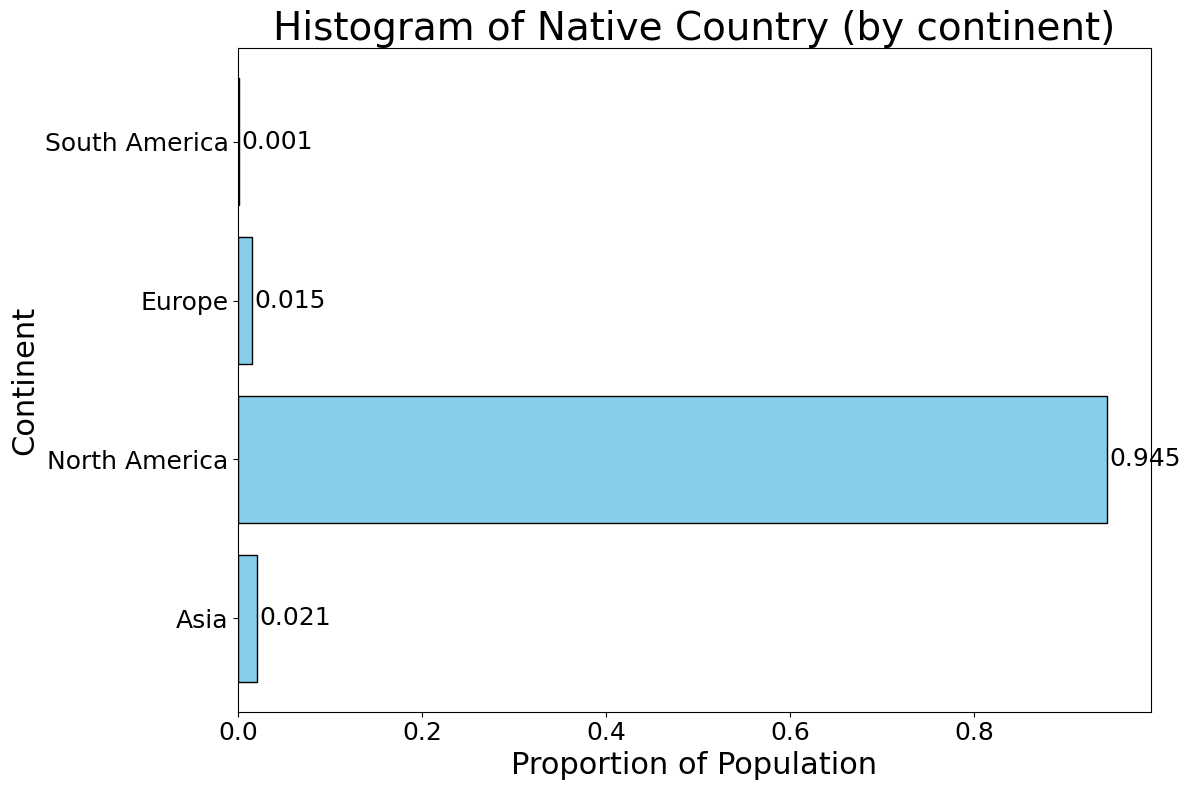

In [48]:
ncountry_distribution = (df.groupby('native-country')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(ncountry_distribution)

continent_groups = {
    'North America': ['Canada', 'United-States', 'Mexico', 'Puerto-Rico', 'Outlying-US(Guam-USVI-etc)', 'Jamaica', 'Dominican-Republic', 'Cuba', 'Haiti', 'El-Salvador', 'Guatemala', 'Nicaragua', 'Honduras', 'Trinadad&Tobago', 'Columbia', 'Ecuador'],
    'Europe': ['England', 'France', 'Germany', 'Greece', 'Holand-Netherlands', 'Hungary', 'Ireland', 'Italy', 'Poland', 'Portugal', 'Scotland', 'Yugoslavia'],
    'Asia': ['Cambodia', 'China', 'Hong', 'India', 'Iran', 'Japan', 'Laos', 'Philippines', 'South', 'Taiwan', 'Thailand', 'Vietnam'],
    'Africa': [],
    'South America': ['Peru'],
    'Oceania': [],
    'Other': []
}
continent_distribution = {}
for country, proportion in ncountry_distribution.items():
    found = False
    for continent, countries in continent_groups.items():
        if country in countries:
            continent_distribution[continent] = continent_distribution.get(continent, 0) + proportion
            found = True
            break
    if not found:
        continent_distribution['Other'] = continent_distribution.get('Other', 0) + proportion
continent_labels = [f"{k}" for k in continent_distribution.keys()]
continent_values = list(continent_distribution.values())

plt.figure(figsize=(12, 8))
plt.barh(continent_labels, continent_values, color='skyblue', edgecolor='black')
plt.title('Histogram of Native Country (by continent)', fontsize=28)
plt.xlabel('Proportion of Population', fontsize=22)
plt.ylabel('Continent', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
for i, value in enumerate(continent_values):
    plt.text(value + 0.002, i, f'{value:.3f}', va='center', fontsize=18)
plt.tight_layout()
plt.show()

# Weighted Workclass Distribution

{'Federal-gov': 0.028380069488549937, 'Local-gov': 0.06437528452930555, 'Never-worked': 0.00023212775265828018, 'Private': 0.7051966278850047, 'Self-emp-inc': 0.03275067868712141, 'Self-emp-not-inc': 0.07319917748192728, 'State-gov': 0.03890616400732109, 'Without-pay': 0.00038062581109622506}


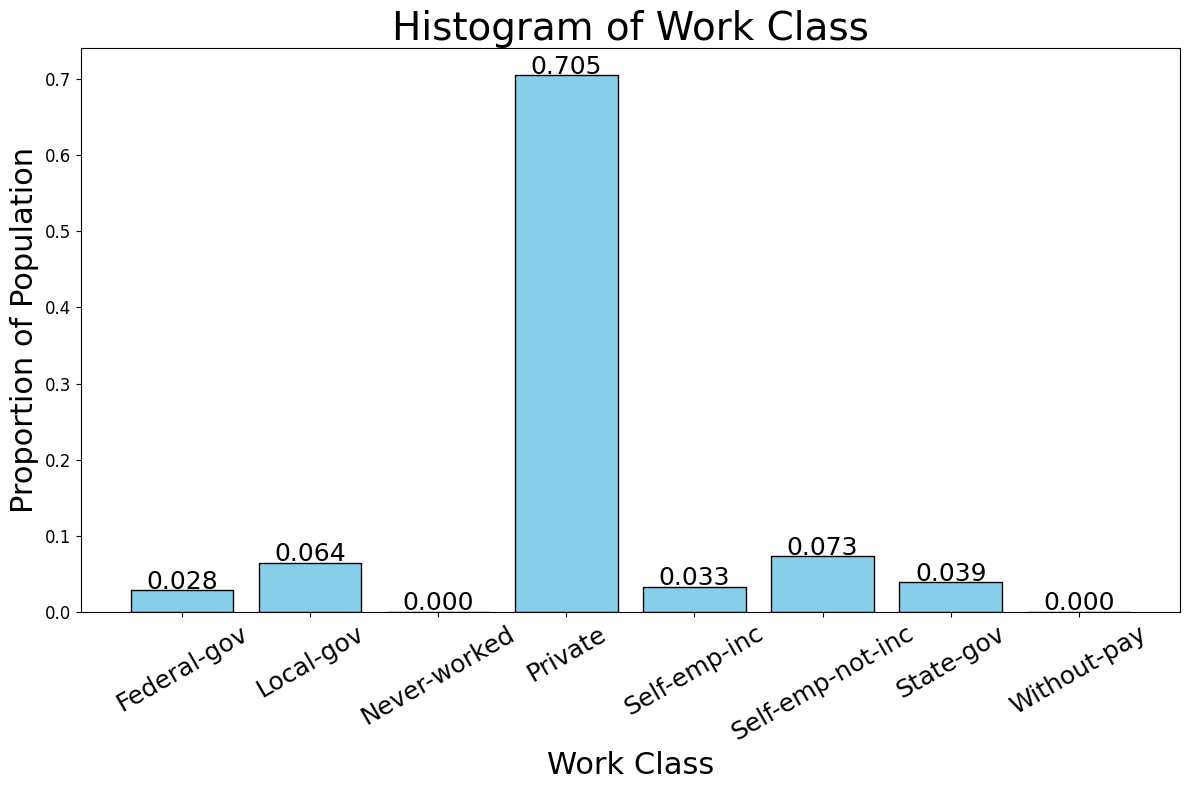

In [40]:
workclass_distribution = (df.groupby('workclass')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(workclass_distribution)

labels = list(workclass_distribution.keys())
values = list(workclass_distribution.values())

plt.figure(figsize=(12, 8))
plt.bar(labels, values, color='skyblue', edgecolor='black')
plt.title('Histogram of Work Class', fontsize=28)
plt.xlabel('Work Class', fontsize=22)
plt.ylabel('Proportion of Population', fontsize=22)
plt.xticks(rotation=30, fontsize=18)
plt.yticks(fontsize=12)
for i, value in enumerate(values):
    plt.text(i, value + 0.002, f'{value:.3f}', ha='center', fontsize=18)
plt.tight_layout()
plt.show()

# Weighted Income Distribution

{'<=50K': 0.7622240390354357, '>50K': 0.2377759609645643}


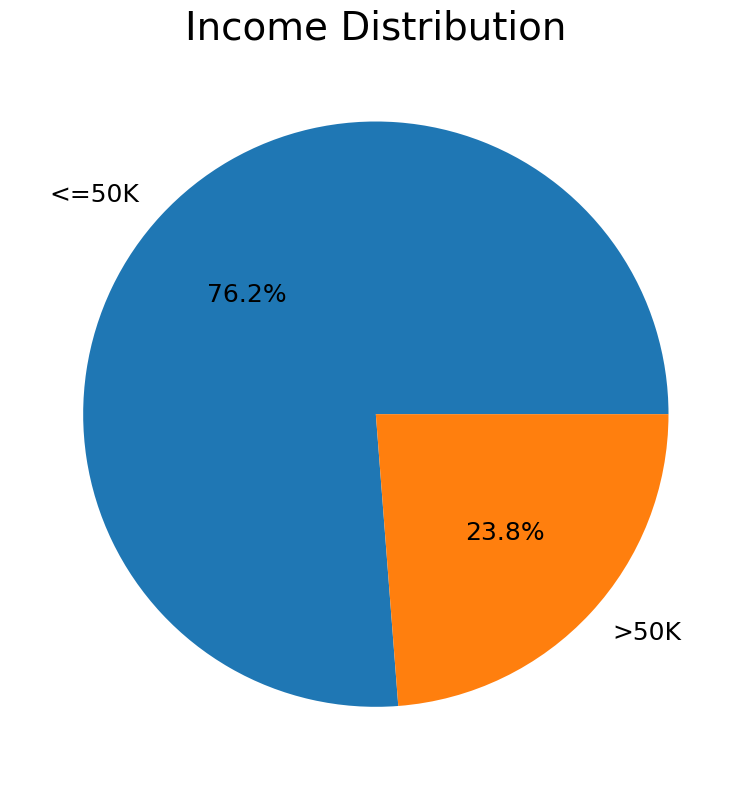

In [53]:
income_distribution = (df.groupby('income')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(income_distribution)

income_labels = list(income_distribution.keys())
income_values = list(income_distribution.values())

plt.figure(figsize=(8, 8))
plt.pie(income_values, labels=income_labels, autopct='%1.1f%%', textprops={'fontsize': 18})
plt.title('Income Distribution', fontsize=28)
plt.tight_layout()
plt.show()

# Weighted Sex Distribution

{'Female': 0.32424719304894256, 'Male': 0.6757528069510574}


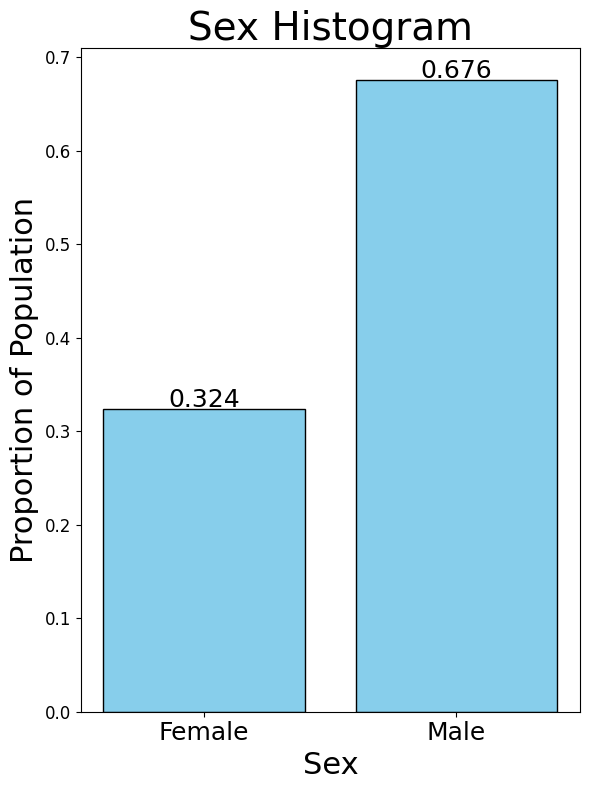

In [52]:
sex_distribution = (df.groupby('sex')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(sex_distribution)

sex_labels = list(sex_distribution.keys())
sex_values = list(sex_distribution.values())

plt.figure(figsize=(6, 8))
plt.bar(sex_labels, sex_values, color='skyblue', edgecolor='black')
plt.title('Sex Histogram', fontsize=28)
plt.xlabel('Sex', fontsize=22)
plt.ylabel('Proportion of Population', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
for i, value in enumerate(sex_values):
    plt.text(i, value + 0.002, f'{value:.3f}', ha='center', fontsize=18)
plt.tight_layout()
plt.show()

# Weighted Relationship Distribution

{'Husband': 0.39841025891757864, 'Not-in-family': 0.25856131437726904, 'Other-relative': 0.03308744508422627, 'Own-child': 0.15858494253209673, 'Unmarried': 0.10587409719372355, 'Wife': 0.04548194189510577}


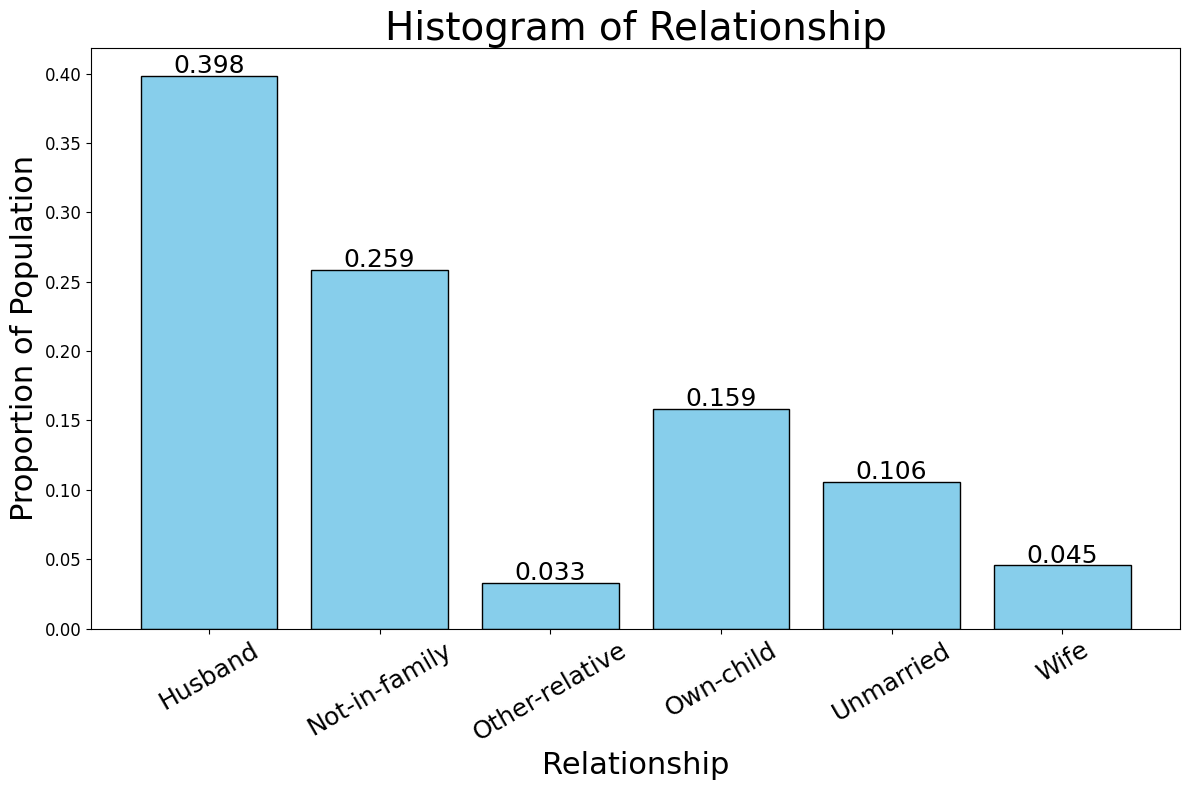

In [43]:
relationship_distribution = (df.groupby('relationship')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(relationship_distribution)

relationship_labels = list(relationship_distribution.keys())
relationship_values = list(relationship_distribution.values())

plt.figure(figsize=(12, 8))
plt.bar(relationship_labels, relationship_values, color='skyblue', edgecolor='black')
plt.title('Histogram of Relationship', fontsize=28)
plt.xlabel('Relationship', fontsize=22)
plt.ylabel('Proportion of Population', fontsize=22)
plt.xticks(rotation=30, fontsize=18)
plt.yticks(fontsize=12)
for i, value in enumerate(relationship_values):
    plt.text(i, value + 0.002, f'{value:.3f}', ha='center', fontsize=18)
plt.tight_layout()
plt.show()

# Weighted Average Hours per Weak Distribution

{1: 0.0005355909187801483, 2: 0.001110879143807656, 3: 0.0011775734768106653, 4: 0.001502640719727734, 5: 0.001782997041601753, 6: 0.0017477536310751623, 7: 0.0008876964252294569, 8: 0.004306831773788993, 9: 0.0005425860578457053, 10: 0.00822093884464027, 11: 0.00029105478255659766, 12: 0.00464480234954009, 13: 0.0005934932903449739, 14: 0.001068289757765461, 15: 0.012683411491090814, 16: 0.005952873923857416, 17: 0.0009196336610004795, 18: 0.002499484415610746, 19: 0.00037384246929681955, 20: 0.03775265175785208, 21: 0.0009668757860683624, 22: 0.0012101099412383685, 23: 0.000869856013920686, 24: 0.007465276748769972, 25: 0.020016737139702544, 26: 0.0008324194977574308, 27: 0.0008371259957222337, 28: 0.0029465861775135357, 29: 0.0003484678182358651, 30: 0.035563565627408374, 31: 0.00024778768844258833, 32: 0.008798474473991942, 33: 0.0013127072572940571, 34: 0.0009296414596500113, 35: 0.039750254268501276, 36: 0.007376472162936601, 37: 0.004874414119077986, 38: 0.014070435839875153, 39

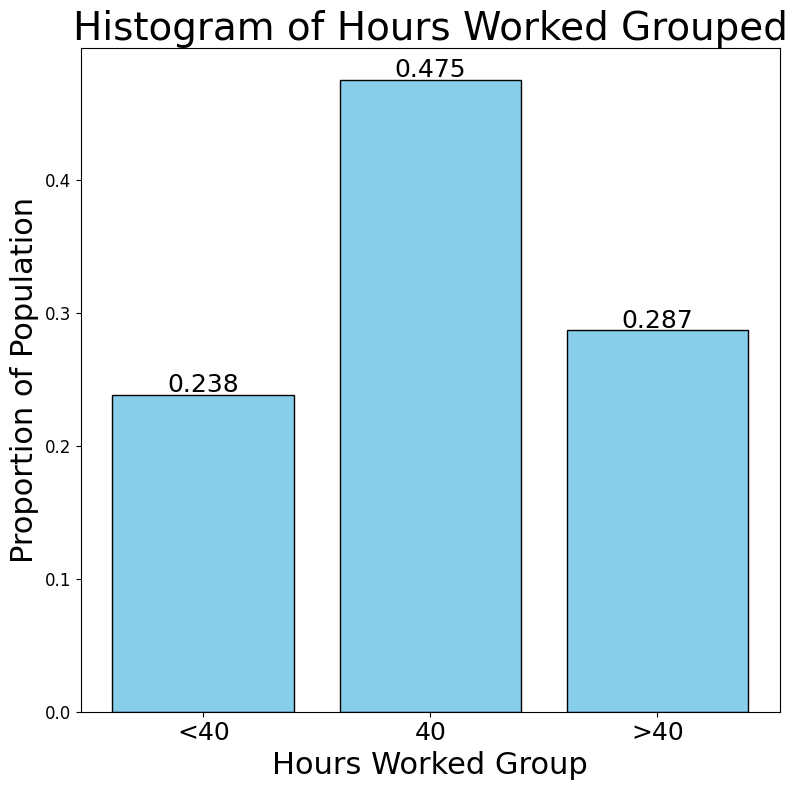

In [44]:
hours_per_week_distribution = (df.groupby('hours-per-week')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(hours_per_week_distribution)
sorted_hours_per_week = dict(sorted(hours_per_week_distribution.items(), key=lambda item: item[1], reverse=True))
print(sorted_hours_per_week)

hours_per_week_distribution_grouped = {"<40":0, "40":0, ">40":0}
for key, value in hours_per_week_distribution.items():
    if key < 40:
        hours_per_week_distribution_grouped["<40"] += value
    elif key == 40:
        hours_per_week_distribution_grouped["40"] += value
    else:
        hours_per_week_distribution_grouped[">40"] += value
print(hours_per_week_distribution_grouped)


average_hours_per_week = 0
for key, value in hours_per_week_distribution.items():
    average_hours_per_week += key * value
print("Average Hours:" , average_hours_per_week)

labels = list(hours_per_week_distribution_grouped.keys())
values = list(hours_per_week_distribution_grouped.values())

plt.figure(figsize=(8, 8))
plt.bar(labels, values, color='skyblue', edgecolor='black')
plt.title('Histogram of Hours Worked Grouped', fontsize=28)
plt.xlabel('Hours Worked Group', fontsize=22)
plt.ylabel('Proportion of Population', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
for i, value in enumerate(values):
    plt.text(i, value + 0.002, f'{value:.3f}', ha='center', fontsize=18)
plt.tight_layout()
plt.show()

# Class Balance of the Dataset

Check the distribution of the target variable (the class you’re trying to predict).

In [108]:
df['income'].value_counts(normalize=True)


income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

## **Preprocessing the Dataset**

In this section, we handle the preprocessing of the Adult Income dataset to prepare it for machine learning.

### **Handling Missing Values**

The dataset contains some missing values, represented as `"NaN"`, particularly in categorical features like `workclass`, `occupation`, and `native-country`. We will address them using two strategies:

- **Removing rows with missing values** to eliminate uncertainty.
- **Replacing missing values** with the most frequent value (mode) in the respective column.

In [109]:
columns = ['workclass', 'occupation', 'native-country']

for col in columns:
    mode_value = df[col].mode()[0]
    mode_count = df[col].value_counts().loc[mode_value]
    total_non_missing = df[col].notna().sum()
    print(f"Column: {col}")
    print(f"  Most common value: {mode_value}")
    print(f"  Frequency: {mode_count} ({mode_count / total_non_missing:.2%} of non-missing values)")
    print()

Column: workclass
  Most common value: Private
  Frequency: 33906 (73.64% of non-missing values)

Column: occupation
  Most common value: Prof-specialty
  Frequency: 6172 (13.41% of non-missing values)

Column: native-country
  Most common value: United-States
  Frequency: 43832 (91.35% of non-missing values)



### **Missing Values Chosen Strategy** 

Missing values in the workclass, occupation, and native-country columns were imputed using the most frequent value (mode) in each column. This strategy retains more data while introducing minimal bias, as the mode values were dominant — especially in native-country (>91%) and workclass (>73%).

In [110]:
original_rows = df.shape[0]

# Drop rows with missing values in the selected columns
df_dropped = df.dropna(subset=['workclass', 'occupation', 'native-country'])

# Number of rows after dropping
remaining_rows = df_dropped.shape[0]

# Number of rows removed
rows_dropped = original_rows - remaining_rows

# Percentage of data lost
percent_lost = (rows_dropped / original_rows) * 100

print(f"Original number of rows: {original_rows}")
print(f"Remaining rows after dropping: {remaining_rows}")
print(f"Rows dropped: {rows_dropped}")
print(f"Percentage of data lost: {percent_lost:.2f}%")

Original number of rows: 48842
Remaining rows after dropping: 45222
Rows dropped: 3620
Percentage of data lost: 7.41%


### **Dropping Rows with missing Values**

The dataset contains missing values in the workclass, occupation, and native-country columns. Dropping rows with missing values would result in a loss of 7.41% of the data (3,620 rows). To preserve the dataset size and avoid potential bias introduced by data loss, we chose to impute missing values using the most frequent (mode) value for each column. The dominant presence of these mode values (e.g., native-country = "United-States" at 91%) supports this choice.

### **Dataset After This Step**

In [111]:
columns_to_impute = ['workclass', 'occupation', 'native-country']
for col in columns_to_impute:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# Check if there are any missing values left
missing_values_after = df.isna().sum()
print("Missing values after imputation:")
print(missing_values_after)

Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### **Encoding Categorical Features**

Machine learning models typically require numerical input. Therefore, we will encode categorical features such as `education`, `marital-status`, and `occupation` using:

- **One-hot encoding** for features with no ordinal relationship.
- **Label encoding** for features with inherent order (if applicable).

In [ ]:
from sklearn.preprocessing import LabelEncoder
print(df.shape)pickle

# One-hot encode nominal categorical features
one_hot_cols = [
    'workclass', 'marital-status', 'occupation', 'relationship',
    'race', 'sex', 'native-country'
]
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)

# Drop the redundant 'education' column
df.drop(columns='education', inplace=True)

# Map income to binary target
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})


(48842, 15)


In [113]:
# Display the first 5 rows to check encoding results
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### **Enconding Resoning and Results**

We encoded the categorical features to convert them into a numeric format suitable for machine learning algorithms. Since the education feature has a clear order of attainment levels, we applied label encoding based on its natural hierarchy, preserving the ordinal relationship. For other categorical features without inherent order—such as workclass, marital-status, occupation, relationship, race, sex, and native-country—we applied one-hot encoding, which created new binary columns for each category. This expanded the feature space but allowed models to interpret categorical data effectively. Lastly, the target variable income was binarized to 0 and 1, facilitating binary classification. This preprocessing step transformed all relevant columns into numeric form, enabling downstream model training.

In [114]:
print(df.shape)

(48842, 90)


### **Why Does The Data Change Shape**

The dataset’s number of columns increases after encoding because one-hot encoding creates a new binary column for each category in the original categorical features. This expands the feature space to convert categorical data into a numeric format suitable for machine learning.

### **Transforming Numerical Features**

Some continuous numerical features contain extreme or highly granular values that could introduce noise:

- `hours-per-week` includes values as low as 1 and as high as 99 — we may **clip or bin these values** into broader categories (e.g., part-time, full-time, overtime).
- `capital-gain` and `capital-loss` have **many rare and highly specific values**, most of which are zero — we may **bucketize or simplify** these into categories like "none", "low", and "high".

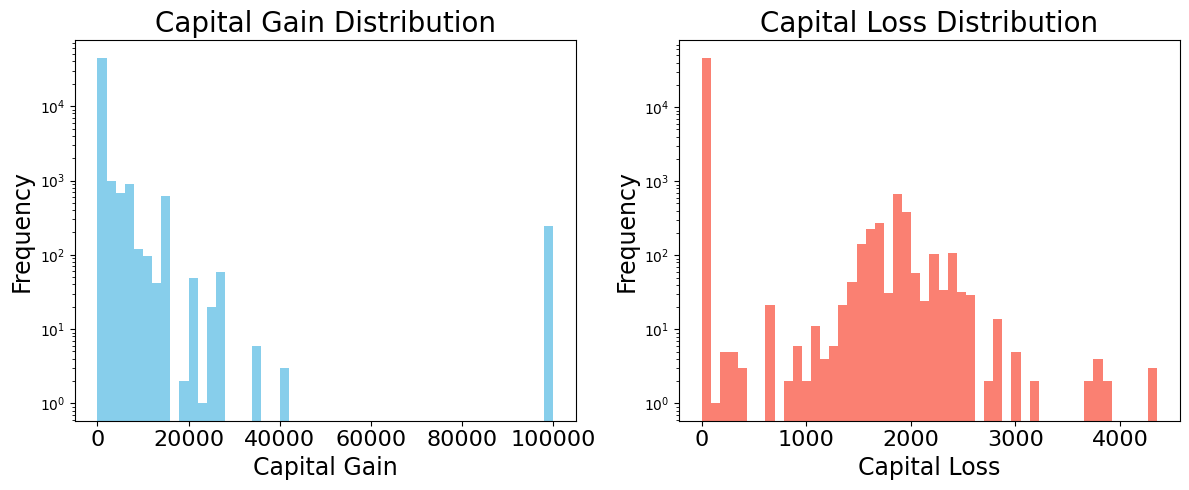

Top capital-gain values:
capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
3103       152
5178       146
5013       117
4386       108
8614        82
3325        81
2174        74
10520       64
4650        63
27828       58
4064        54
594         52
3137        51
20051       49
14084       49
Name: count, dtype: int64

Top capital-loss values:
capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
1485       71
1848       67
1590       62
1602       62
1876       59
1740       58
1672       50
1741       44
1564       43
2258       39
1719       38
1980       36
2001       35
1408       35
1669       35
Name: count, dtype: int64


In [64]:
import matplotlib.pyplot as plt

# Plot capital-gain distribution (log scale to handle skewness)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(df['capital-gain'], bins=50, color='skyblue')
plt.title('Capital Gain Distribution', fontsize=20)
plt.xlabel('Capital Gain', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.yscale('log')  # Log scale for better visibility of rare high values
plt.xticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.hist(df['capital-loss'], bins=50, color='salmon')
plt.title('Capital Loss Distribution', fontsize=20)
plt.xlabel('Capital Loss', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.yscale('log')
plt.xticks(fontsize=16)

plt.tight_layout()
plt.show()

# Also, print value counts for the top values to see where to place threshold
print("Top capital-gain values:")
print(df['capital-gain'].value_counts().head(20))

print("\nTop capital-loss values:")
print(df['capital-loss'].value_counts().head(20))


### **Binning Strategy**

To simplify the numerical features and reduce noise from extreme values, we binned capital-gain and capital-loss into three categories: "none" for zero values, "low" for values up to a chosen threshold, and "high" for values above it. Based on data distribution analysis, we selected 7,000 as the threshold for capital-gain and 2,000 for capital-loss. Additionally, we transformed hours-per-week into categorical bins representing work intensity: "part-time" (≤30 hours), "full-time" (31–40 hours), and "overtime" (>40 hours). This binning strategy groups continuous values into meaningful categories, helping reduce noise and improving model interpretability.

In [116]:
import numpy as np


# Copy original dataframe
df_transformed = df.copy()

# Binning hours-per-week
def hours_bin(hours):
    if hours <= 30:
        return 'part-time'
    elif hours <= 40:
        return 'full-time'
    else:
        return 'overtime'

df_transformed['hours-per-week-binned'] = df_transformed['hours-per-week'].apply(hours_bin)

# Binning capital-gain
def capital_gain_bin(gain):
    if gain == 0:
        return 'none'
    elif gain <= 7000:
        return 'low'
    else:
        return 'high'

df_transformed['capital-gain-binned'] = df_transformed['capital-gain'].apply(capital_gain_bin)

# Binning capital-loss
def capital_loss_bin(loss):
    if loss == 0:
        return 'none'
    elif loss <= 2000:
        return 'low'
    else:
        return 'high'

df_transformed['capital-loss-binned'] = df_transformed['capital-loss'].apply(capital_loss_bin)

# Drop original continuous columns
df_transformed = df_transformed.drop(columns=['hours-per-week', 'capital-gain', 'capital-loss'])

# One-hot encode the new binned columns
binned_cols = ['hours-per-week-binned', 'capital-gain-binned', 'capital-loss-binned']
df_transformed = pd.get_dummies(df_transformed, columns=binned_cols)
# Check results
print(df_transformed.shape)
print(df_transformed.head())


(48842, 96)
   age  fnlwgt  education-num  income  workclass_Federal-gov  \
0   39   77516             13       0                  False   
1   50   83311             13       0                  False   
2   38  215646              9       0                  False   
3   53  234721              7       0                  False   
4   28  338409             13       0                  False   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False              False   
1                False                   False              False   
2                False                   False               True   
3                False                   False               True   
4                False                   False               True   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
0                   False                       False  ...   
1                   False                        True  ...   
2 

### **2 Versions Of Our Dataset**


This step of transforming numerical features into binned categories was considered optional. To evaluate its impact on model performance, we decided to create and retain two versions of the dataset: one with the original continuous numerical features, and another with the binned and encoded versions. This approach allows for a direct comparison to determine which preprocessing strategy yields better results.

In [153]:
df1 = df.copy()
df2 = df_transformed.copy()

print("Original DataFrame shape:", df1.shape)

Original DataFrame shape: (48842, 90)


### **Splitting the Data**

We will explore one approaches to splitting the dataset for training and testing:

- Perform **random train/test splits** (e.g., 80/20 or 70/30) using `train_test_split` for experimentation and validation.

### **Optional: Addressing Class Imbalance**

If we find that the dataset is imbalanced (e.g., far more samples with income ≤50K than >50K), we may apply techniques to balance the classes:

- **Oversampling** the minority class.
- **Undersampling** the majority class.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import numpy as np

# Assuming df1 and df2 include features + target 'income'
X1, y1 = df1.drop(columns='income'), df1['income']
X2, y2 = df2.drop(columns='income'), df2['income']

def generate_splits(X, y, n_splits=10, test_size=0.2, random_state=42):
    raw_splits = []
    over_splits = []
    under_splits = []
    
    ros = RandomOverSampler(random_state=random_state)
    rus = RandomUnderSampler(random_state=random_state)
    
    for i in range(n_splits):
        rs = random_state + i  # change seed for diversity
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, stratify=y, random_state=rs
        )
        
        # Raw (no sampling)
        raw_splits.append((X_train, X_test, y_train, y_test))
        
        # Oversampling only
        X_over, y_over = ros.fit_resample(X_train, y_train)
        over_splits.append((X_over, X_test, y_over, y_test))
        
        # Undersampling only
        X_under, y_under = rus.fit_resample(X_train, y_train)
        under_splits.append((X_under, X_test, y_under, y_test))
        
    
    return raw_splits, over_splits, under_splits

# Generate splits for df1
df1_raw, df1_OverSampling, df1_UnderSampling = generate_splits(X1, y1)

# Generate splits for df2
df2_raw, df2_OverSampling, df2_UnderSampling = generate_splits(X2, y2)

# Example of accessing a split:
# X_train, X_test, y_train, y_test = df1_OverSampling[0]



In [ ]:
#printing the shape of the first split for df1
print("Shape of first split for df1 (raw):", df1_raw[0][0].shape)
print("Shape of first split for df1 (oversampled):", df1_OverSampling[0][0].shape)
print("Shape of first split for df1 (undersampled):", df1_UnderSampling[0][0].shape)
# Printing the shape of the first split for df2
print("Shape of first split for df2 (raw):", df2_raw[0][0].shape)
print("Shape of first split for df2 (oversampled):", df2_OverSampling[0][0].shape)
print("Shape of first split for df2 (undersampled):", df2_UnderSampling[0][0].shape)

Shape of first split for df1 (raw): (9769, 89)
Shape of first split for df1 (oversampled): (59448, 89)
Shape of first split for df1 (undersampled): (18698, 89)
Shape of first split for df2 (raw): (39073, 95)
Shape of first split for df2 (oversampled): (59448, 95)
Shape of first split for df2 (undersampled): (18698, 95)


### **Splitting and sampling Strategy**


We created multiple random 80/20 train-test splits for each dataset version to ensure robust evaluation across different data partitions. To address the class imbalance present in the income target variable, we generated splits under four conditions:

Raw data with no sampling applied,

Oversampling of the minority class,

Undersampling of the majority class, and

Stratified splitting was used to maintain the original class distribution in each split, ensuring consistent representation of both income classes during training and testing. This approach allows us to compare the impact of different sampling techniques on model performance more reliably.

## **Model Implementation**

In this section, we will implement and evaluate various machine learning models to predict whether an individual's income exceeds $50K based on the features in the dataset. The objective is to confirm and apply machine learning theory learned in class, deepen our understanding of classification models, and identify the most effective approach for this problem.


### **Evaluation Metrics**

All models will be evaluated using key classification metrics to gain a comprehensive view of performance:

- **Accuracy**  
  The proportion of total predictions that are correct. Good for balanced datasets.

- **Precision**  
  The proportion of positive predictions that were actually correct. Important when false positives are costly.

- **Recall**  
  The proportion of actual positives that were correctly predicted. Important when false negatives are costly.

- **F1-Score**  
  The harmonic mean of precision and recall. Useful when you need a balance between precision and recall.

- **ROC AUC Score**  
  Measures the ability of the model to distinguish between classes across different thresholds. A higher score indicates better overall classification performance.


### **Implemented Models**

We will start by implementing the following classification models:

- **Logistic Regression**  
  A simple and interpretable linear model; it's a good baseline for binary classification tasks.

In [119]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# List of dataset split arrays (you must already have these defined)
datasets = {
    'df1_raw': df1_raw,
    'df1_OverSampling': df1_OverSampling,
    'df1_UnderSampling': df1_UnderSampling,
    'df2_raw': df2_raw,
    'df2_OverSampling': df2_OverSampling,
    'df2_UnderSampling': df2_UnderSampling,
}

# Initialize empty list to collect all results
results = []

for name, splits in datasets.items():
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
        
        # Create pipeline with scaling
        model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Compute metrics
        metrics = {
            'dataset': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba)
        }

        results.append(metrics)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Group by dataset and compute mean and std
grouped = results_df.groupby('dataset').agg(['mean', 'std']).round(4)

# Create a new DataFrame to store "mean ± std" strings
formatted = pd.DataFrame(index=grouped.index)

# Loop through metric columns
for metric in grouped.columns.levels[0]:
    mean_col = (metric, 'mean')
    std_col = (metric, 'std')
    
    formatted[metric] = grouped[mean_col].astype(str) + ' ± ' + grouped[std_col].astype(str)

# Print pretty table
print("\n📊 Logistic Regression Performance (mean ± std):\n")
print(formatted.to_string())



📊 Logistic Regression Performance (mean ± std):

                          accuracy        precision           recall               f1          roc_auc
dataset                                                                                               
df1_OverSampling   0.8055 ± 0.0042  0.5624 ± 0.0062  0.8442 ± 0.0094   0.675 ± 0.0064  0.9033 ± 0.0031
df1_UnderSampling  0.8045 ± 0.0047  0.5609 ± 0.0072   0.8441 ± 0.009   0.674 ± 0.0063   0.9031 ± 0.003
df1_raw            0.8503 ± 0.0035  0.7288 ± 0.0105  0.5967 ± 0.0089  0.6561 ± 0.0078  0.9036 ± 0.0031
df2_OverSampling   0.8104 ± 0.0036  0.5702 ± 0.0055   0.8448 ± 0.008  0.6809 ± 0.0054  0.9076 ± 0.0029
df2_UnderSampling   0.8098 ± 0.004  0.5691 ± 0.0062  0.8459 ± 0.0087  0.6804 ± 0.0056  0.9075 ± 0.0029
df2_raw            0.8545 ± 0.0034   0.747 ± 0.0116  0.5932 ± 0.0083  0.6612 ± 0.0075  0.9078 ± 0.0028


📊 Logistic Regression Performance (mean ± std):

                          accuracy        precision           recall               f1          roc_auc
dataset                                                                                               
df1_OverSampling   0.8055 ± 0.0042  0.5624 ± 0.0062  0.8442 ± 0.0094   0.675 ± 0.0064  0.9033 ± 0.0031
df1_UnderSampling  0.8045 ± 0.0047  0.5609 ± 0.0072   0.8441 ± 0.009   0.674 ± 0.0063   0.9031 ± 0.003
df1_raw            0.8503 ± 0.0035  0.7288 ± 0.0105  0.5967 ± 0.0089  0.6561 ± 0.0078  0.9036 ± 0.0031
df2_OverSampling   0.8104 ± 0.0036  0.5702 ± 0.0055   0.8448 ± 0.008  0.6809 ± 0.0054  0.9076 ± 0.0029
df2_UnderSampling   0.8098 ± 0.004  0.5691 ± 0.0062  0.8459 ± 0.0087  0.6804 ± 0.0056  0.9075 ± 0.0029
df2_raw            0.8545 ± 0.0034   0.747 ± 0.0116  0.5932 ± 0.0083  0.6612 ± 0.0075  0.9078 ± 0.0028

### **Conclusoes**

falar do que se fez 
falar da pipeline e dizer que diminui muito o tempo de treino

- **Random Forest Classifier**  
  A robust ensemble method that reduces overfitting; chosen for its ability to handle non-linear relationships and mixed feature types.


In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
skip = True
if skip:
    print("Skipping Random Forest model training and evaluation.")
else:
    # List of dataset split arrays (already defined)
    datasets = {
        'df1_raw': df1_raw,
        'df1_OverSampling': df1_OverSampling,
        'df1_UnderSampling': df1_UnderSampling,
        'df2_raw': df2_raw,
        'df2_OverSampling': df2_OverSampling,
        'df2_UnderSampling': df2_UnderSampling,
    }

    # Initialize empty list to collect all results
    rf_results = []

    for name, splits in datasets.items():
        
        for i, (X_train, X_test, y_train, y_test) in enumerate(splits):

            # Initialize Random Forest model
            model =  RandomForestClassifier(random_state=42, n_estimators= 100)

            # Train model
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1]

            # Compute metrics
            metrics = {
                'dataset': name,
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred),
                'recall': recall_score(y_test, y_pred),
                'f1': f1_score(y_test, y_pred),
                'roc_auc': roc_auc_score(y_test, y_proba)
            }

            rf_results.append(metrics)

    # Convert results to DataFrame
    rf_results_df = pd.DataFrame(rf_results)

    # Group by dataset and compute mean and std
    grouped = rf_results_df.groupby('dataset').agg(['mean', 'std']).round(4)

    # Create a new DataFrame to store "mean ± std" strings
    formatted = pd.DataFrame(index=grouped.index)

    # Loop through metric columns
    for metric in grouped.columns.levels[0]:
        mean_col = (metric, 'mean')
        std_col = (metric, 'std')
        
        formatted[metric] = grouped[mean_col].astype(str) + ' ± ' + grouped[std_col].astype(str)

    # Print pretty table
    print("\n📊 Random Forest Performance (mean ± std):\n")
    print(formatted.to_string())


Skipping Random Forest model training and evaluation.


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

skip = True
if skip:
    print("Skipping Random Forest model training and evaluation.")
else:

    # List of dataset split arrays (already defined)
    datasets = {
        'df1_raw': df1_raw,
        'df1_OverSampling': df1_OverSampling,
        'df1_UnderSampling': df1_UnderSampling,
        'df2_raw': df2_raw,
        'df2_OverSampling': df2_OverSampling,
        'df2_UnderSampling': df2_UnderSampling,
    }

    # Initialize empty list to collect all results
    rf_results = []

    for name, splits in datasets.items():
        
        for i, (X_train, X_test, y_train, y_test) in enumerate(splits):

            # Initialize Random Forest model
            model = RandomForestClassifier(random_state=42, n_estimators= 100)

            # Train model
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1]

            # Compute metrics
            metrics = {
                'dataset': name,
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, pos_label=0),
                'recall': recall_score(y_test, y_pred, pos_label=0),
                'f1': f1_score(y_test, y_pred, pos_label=0),
                'roc_auc': roc_auc_score(y_test, y_proba)
            }

            rf_results.append(metrics)

    # Convert results to DataFrame
    rf_results_df = pd.DataFrame(rf_results)

    # Group by dataset and compute mean and std
    grouped = rf_results_df.groupby('dataset').agg(['mean', 'std']).round(4)

    # Create a new DataFrame to store "mean ± std" strings
    formatted = pd.DataFrame(index=grouped.index)

    # Loop through metric columns
    for metric in grouped.columns.levels[0]:
        mean_col = (metric, 'mean')
        std_col = (metric, 'std')
        
        formatted[metric] = grouped[mean_col].astype(str) + ' ± ' + grouped[std_col].astype(str)

    # Print pretty table
    print("\n📊 Random Forest Performance for Class 0 (mean ± std):\n")
    print(formatted.to_string())


Skipping Random Forest model training and evaluation.


### **Conclusoes**

- **Gradient Boosting (XGBoost or LightGBM)**  
  A highly accurate boosting algorithm; selected for its strong performance in structured/tabular data and ability to capture complex patterns.


In [122]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# List of dataset split arrays (already defined)
datasets = {
    'df1_raw': df1_raw,
    'df1_OverSampling': df1_OverSampling,
    'df1_UnderSampling': df1_UnderSampling,
    'df2_raw': df2_raw,
    'df2_OverSampling': df2_OverSampling,
    'df2_UnderSampling': df2_UnderSampling,
}

# Initialize list to collect results
xgb_results = []

for name, splits in datasets.items():
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):

        # Initialize XGBoost model
        model =  XGBClassifier(eval_metric='logloss', random_state=42)

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Metrics
        metrics = {
            'dataset': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba)
        }

        xgb_results.append(metrics)

# Convert results to DataFrame
xgb_results_df = pd.DataFrame(xgb_results)

# Group by dataset and compute mean and std
grouped = xgb_results_df.groupby('dataset').agg(['mean', 'std']).round(4)

# Create a new DataFrame to store "mean ± std" strings
formatted = pd.DataFrame(index=grouped.index)

# Loop through metric columns
for metric in grouped.columns.levels[0]:
    mean_col = (metric, 'mean')
    std_col = (metric, 'std')
    
    formatted[metric] = grouped[mean_col].astype(str) + ' ± ' + grouped[std_col].astype(str)

# Print pretty table
print("\n📊 XGBoost Performance (mean ± std):\n")
print(formatted.to_string())




📊 XGBoost Performance (mean ± std):

                          accuracy        precision           recall               f1          roc_auc
dataset                                                                                               
df1_OverSampling   0.8356 ± 0.0031  0.6132 ± 0.0053  0.8482 ± 0.0078  0.7118 ± 0.0049  0.9267 ± 0.0031
df1_UnderSampling  0.8269 ± 0.0035   0.5951 ± 0.006  0.8663 ± 0.0077  0.7055 ± 0.0049  0.9251 ± 0.0033
df1_raw            0.8717 ± 0.0042  0.7751 ± 0.0119  0.6537 ± 0.0131  0.7092 ± 0.0101  0.9275 ± 0.0036
df2_OverSampling   0.8195 ± 0.0037  0.5866 ± 0.0064  0.8328 ± 0.0077  0.6883 ± 0.0048   0.911 ± 0.0028
df2_UnderSampling  0.8096 ± 0.0035  0.5682 ± 0.0057  0.8518 ± 0.0057  0.6817 ± 0.0039  0.9102 ± 0.0027
df2_raw            0.8578 ± 0.0029   0.7429 ± 0.009  0.6207 ± 0.0107  0.6763 ± 0.0074  0.9123 ± 0.0028


In [123]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# List of dataset split arrays (already defined)
datasets = {
    'df1_raw': df1_raw,
    'df1_OverSampling': df1_OverSampling,
    'df1_UnderSampling': df1_UnderSampling,
    'df2_raw': df2_raw,
    'df2_OverSampling': df2_OverSampling,
    'df2_UnderSampling': df2_UnderSampling,
}

# Initialize list to collect results
xgb_results = []

for name, splits in datasets.items():
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):

        # Initialize XGBoost model
        model =  XGBClassifier(eval_metric='logloss', random_state=42)

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Metrics
        metrics = {
            'dataset': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, pos_label=0),
            'recall': recall_score(y_test, y_pred, pos_label=0),
            'f1': f1_score(y_test, y_pred, pos_label=0),
            'roc_auc': roc_auc_score(y_test, y_proba)
        }

        xgb_results.append(metrics)

# Convert results to DataFrame
xgb_results_df = pd.DataFrame(xgb_results)

# Group by dataset and compute mean and std
grouped = xgb_results_df.groupby('dataset').agg(['mean', 'std']).round(4)

# Create a new DataFrame to store "mean ± std" strings
formatted = pd.DataFrame(index=grouped.index)

# Loop through metric columns
for metric in grouped.columns.levels[0]:
    mean_col = (metric, 'mean')
    std_col = (metric, 'std')
    
    formatted[metric] = grouped[mean_col].astype(str) + ' ± ' + grouped[std_col].astype(str)

# Print pretty table
print("\n📊 XGBoost Performance for class 0 (mean ± std):\n")
print(formatted.to_string())


📊 XGBoost Performance for class 0 (mean ± std):

                          accuracy        precision           recall               f1          roc_auc
dataset                                                                                               
df1_OverSampling   0.8356 ± 0.0031  0.9457 ± 0.0026  0.8317 ± 0.0037   0.885 ± 0.0023  0.9267 ± 0.0031
df1_UnderSampling  0.8269 ± 0.0035  0.9509 ± 0.0026  0.8145 ± 0.0048  0.8774 ± 0.0027  0.9251 ± 0.0033
df1_raw            0.8717 ± 0.0042  0.8962 ± 0.0035   0.9403 ± 0.004  0.9177 ± 0.0027  0.9275 ± 0.0036
df2_OverSampling   0.8195 ± 0.0037  0.9394 ± 0.0025  0.8153 ± 0.0054   0.873 ± 0.0029   0.911 ± 0.0028
df2_UnderSampling  0.8096 ± 0.0035  0.9447 ± 0.0019  0.7963 ± 0.0053  0.8642 ± 0.0029  0.9102 ± 0.0027
df2_raw            0.8578 ± 0.0029  0.8866 ± 0.0027  0.9324 ± 0.0034  0.9089 ± 0.0019  0.9123 ± 0.0028


### **Conclusoes**

### **Hyperparameter Tuning and Model Selection**

To improve model performance, we may apply:

- **Cross-validation**  
  Using k-fold cross-validation to evaluate model reliability across different data splits.

- **Grid Search or Randomized Search**  
  For systematic tuning of hyperparameters, especially in Random Forest and Gradient Boosting models.

As an enhancement, we performed hyperparameter tuning using GridSearchCV for Random Forest and RandomizedSearchCV for XGBoost. This process involved k-fold cross-validation to systematically evaluate model performance across different parameter settings. The objective was to identify configurations that improve classification metrics such as F1-score and ROC AUC, thereby strengthening the model's generalization capability. Once optimal parameters were found, the models were re-evaluated to confirm the improvement.

### **Hyperparameter Tuning**


Bank – High 	>=50K (1) precision         xgboost         df1_raw            0.8717 ± 0.0042  0.7751 ± 0.0119  0.6537 ± 0.0131  0.7092 ± 0.0101  0.9275 ± 0.0036

IRS investigation       >=50K (1) recall    xgboost         df1_UnderSampling  0.8269 ± 0.0035   0.5951 ± 0.006  0.8663 ± 0.0077  0.7055 ± 0.0049  0.9251 ± 0.0033

Gov Aid                 <50k (0) recall     xgboost         df1_raw              0.8711     0.8956  0.9401  0.9173   0.9275


In [124]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Common cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


### TUNING FOR PRECISION CLASS 1

In [125]:
X_train, X_test, y_train, y_test = df1_raw[0]

grid_search_precision = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=xgb_param_grid,
    cv=cv,
    scoring='precision',
    n_jobs=-1,
    verbose=0
)

grid_search_precision.fit(X_train, y_train)

print("\n🎯 Best parameters for Precision:", grid_search_precision.best_params_)
print("✅ Best Precision from CV:", grid_search_precision.best_score_)



🎯 Best parameters for Precision: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
✅ Best Precision from CV: 0.9846742351216274


In [174]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# List of dataset split arrays (already defined)
datasets = {
    'df1_raw': df1_raw
}

# Initialize list to collect results
xgb_results = []

for name, splits in datasets.items():
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):

        # Initialize XGBoost model
        model = XGBClassifier(eval_metric='logloss', random_state=42, colsample_bytree=1.0, learning_rate=0.01, max_depth= 3, n_estimators= 100, subsample= 1.0)

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Metrics
        metrics = {
            'dataset': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba)
        }

        # Collect feature importances
        feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
        feature_importances.name = f"{name}_split_{i}"
        xgb_results.append(metrics)
        # Save importance separately
        if 'feature_importance_bank' not in locals():
            feature_importance_bank = []
        feature_importance_bank.append(feature_importances)


        xgb_results.append(metrics)

# Convert results to DataFrame
xgb_results_df = pd.DataFrame(xgb_results)

# Group by dataset and compute mean and std
grouped = xgb_results_df.groupby('dataset').agg(['mean', 'std']).round(4)

# Create a new DataFrame to store "mean ± std" strings
formatted = pd.DataFrame(index=grouped.index)

# Loop through metric columns
for metric in grouped.columns.levels[0]:
    mean_col = (metric, 'mean')
    std_col = (metric, 'std')
    
    formatted[metric] = grouped[mean_col].astype(str) + ' ± ' + grouped[std_col].astype(str)

# Save this model in a pickle file
import pickle
# Save model and feature names together
model_package = {
    'model': model,
    'feature_names': model.feature_names_in_.tolist()
}

with open('xgb_model_precision_tuned.pkl', 'wb') as f:
    pickle.dump(model_package, f)

# Save feature importances to a DataFrame

# Print pretty table
print("Before Precision Tune: df1_raw            0.8717 ± 0.0042  0.7751 ± 0.0119  0.6537 ± 0.0131  0.7092 ± 0.0101  0.9275 ± 0.0036")
print("\n📊 XGBoost Performance (mean ± std):\n")
print(formatted.to_string())

Before Precision Tune: df1_raw            0.8717 ± 0.0042  0.7751 ± 0.0119  0.6537 ± 0.0131  0.7092 ± 0.0101  0.9275 ± 0.0036

📊 XGBoost Performance (mean ± std):

                accuracy        precision           recall               f1          roc_auc
dataset                                                                                     
df1_raw  0.8161 ± 0.0023  0.9819 ± 0.0031  0.2361 ± 0.0099  0.3806 ± 0.0128  0.8905 ± 0.0033


### TUNING FOR RECALL OF CLASS 1

In [ ]:
X_train, X_test, y_train, y_test = df1_UnderSampling[0]

grid_search_precision = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=xgb_param_grid,
    cv=cv,
    scoring='recall',
    n_jobs=-1,
    verbose=0
)

grid_search_precision.fit(X_train, y_train)

print("\n🎯 Best parameters for Recall:", grid_search_precision.best_params_)
print("✅ Best Recall from CV:", grid_search_precision.best_score_)



🎯 Best parameters for Precision: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
✅ Best Precision from CV: 0.8784884822161754


In [175]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# List of dataset split arrays (already defined)
datasets = {
    'df1_UnderSampling': df1_UnderSampling,
}

# Initialize list to collect results
xgb_results = []

for name, splits in datasets.items():
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):

        # Initialize XGBoost model
        model = XGBClassifier(eval_metric='logloss', random_state=42, colsample_bytree=0.8, learning_rate=0.01, max_depth= 3, n_estimators= 200, subsample= 1.0)

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Metrics
        metrics = {
            'dataset': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba)
        }

        # Collect feature importances
        feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
        feature_importances.name = f"{name}_split_{i}"
        xgb_results.append(metrics)
        # Save importance separately
        if 'feature_importance_irs' not in locals():
            feature_importance_irs = []
        feature_importance_irs.append(feature_importances)

        xgb_results.append(metrics)

# Convert results to DataFrame
xgb_results_df = pd.DataFrame(xgb_results)

# Group by dataset and compute mean and std
grouped = xgb_results_df.groupby('dataset').agg(['mean', 'std']).round(4)

# Create a new DataFrame to store "mean ± std" strings
formatted = pd.DataFrame(index=grouped.index)

# Loop through metric columns
for metric in grouped.columns.levels[0]:
    mean_col = (metric, 'mean')
    std_col = (metric, 'std')
    
    formatted[metric] = grouped[mean_col].astype(str) + ' ± ' + grouped[std_col].astype(str)

# Save this model in a pickle file
import pickle
# Save model and feature names together
model_package = {
    'model': model,
    'feature_names': model.feature_names_in_.tolist()
}

with open('xgb_model_recall_tuned.pkl', 'wb') as f:
    pickle.dump(model_package, f)


# Print pretty table
print("Before Recall Tune: df1_UnderSampling  0.8269 ± 0.0035   0.5951 ± 0.006  0.8663 ± 0.0077  0.7055 ± 0.0049  0.9251 ± 0.0033")
print("\n📊 XGBoost Performance (mean ± std):\n")
print(formatted.to_string())

Before Recall Tune: df1_UnderSampling  0.8269 ± 0.0035   0.5951 ± 0.006  0.8663 ± 0.0077  0.7055 ± 0.0049  0.9251 ± 0.0033

📊 XGBoost Performance (mean ± std):

                          accuracy        precision         recall              f1         roc_auc
dataset                                                                                           
df1_UnderSampling  0.7789 ± 0.0066  0.5228 ± 0.0089  0.88 ± 0.0103  0.6558 ± 0.006  0.902 ± 0.0031


### TUNING FOR RECALL OF CLASS 0

In [129]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from xgboost import XGBClassifier

# Split do dataset
X_train, X_test, y_train, y_test = df1_raw[0]

# Grid de parâmetros (exemplo, substitua pelo seu)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scorer focado em recall da classe 0
recall_class0 = make_scorer(recall_score, pos_label=0)

# GridSearch
grid_search_recall = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=xgb_param_grid,
    cv=cv,
    scoring=recall_class0,
    n_jobs=-1,
    verbose=0
)

grid_search_recall.fit(X_train, y_train)

print("\n📈 Best parameters for Recall (classe 0):", grid_search_recall.best_params_)
print("✅ Best Recall (classe 0) from CV:", grid_search_recall.best_score_)



📈 Best parameters for Recall (classe 0): {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
✅ Best Recall (classe 0) from CV: 0.9988561533663789


In [176]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Dataset
datasets = {
    'df1_raw': df1_raw,
}

xgb_results = []

for name, splits in datasets.items():
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):

        # Modelo com melhores parâmetros encontrados
        model = XGBClassifier(
            eval_metric='logloss',
            random_state=42,
            colsample_bytree=1.0,
            learning_rate=0.01,
            max_depth=3,
            n_estimators=100,
            subsample=1.0
        )

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Métricas com foco na classe 0
        metrics = {
            'dataset': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, pos_label=0),
            'recall': recall_score(y_test, y_pred, pos_label=0),
            'f1': f1_score(y_test, y_pred, pos_label=0),
            'roc_auc': roc_auc_score(y_test, y_proba)  # Classe 1 como positiva
        }

        # Collect feature importances
        feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
        feature_importances.name = f"{name}_split_{i}"
        xgb_results.append(metrics)
        # Save importance separately
        if 'feature_importance_aid' not in locals():
            feature_importance_aid = []
        feature_importance_aid.append(feature_importances)

        xgb_results.append(metrics)

# DataFrame
xgb_results_df = pd.DataFrame(xgb_results)

# Group by dataset and compute mean and std
grouped = xgb_results_df.groupby('dataset').agg(['mean', 'std']).round(4)

# Create a new DataFrame to store "mean ± std" strings
formatted = pd.DataFrame(index=grouped.index)

# Loop through metric columns
for metric in grouped.columns.levels[0]:
    mean_col = (metric, 'mean')
    std_col = (metric, 'std')
    
    formatted[metric] = grouped[mean_col].astype(str) + ' ± ' + grouped[std_col].astype(str)

# Save this model in a pickle file
import pickle

# Save model and feature names together
model_package = {
    'model': model,
    'feature_names': model.feature_names_in_.tolist()
}

with open('xgb_model_recall_class_zero_tuned.pkl', 'wb') as f:
    pickle.dump(model_package, f)


# Print pretty table
print("Before Recall Tune: df1_raw            0.8717 ± 0.0042  0.8962 ± 0.0035   0.9403 ± 0.004  0.9177 ± 0.0027  0.9275 ± 0.0036")
print("\n📊 XGBoost Performance for class 0 (mean ± std):\n")
print(formatted.to_string())


Before Recall Tune: df1_raw            0.8717 ± 0.0042  0.8962 ± 0.0035   0.9403 ± 0.004  0.9177 ± 0.0027  0.9275 ± 0.0036

📊 XGBoost Performance for class 0 (mean ± std):

                accuracy      precision           recall              f1          roc_auc
dataset                                                                                  
df1_raw  0.8161 ± 0.0023  0.806 ± 0.002  0.9986 ± 0.0003  0.892 ± 0.0012  0.8905 ± 0.0033


### Fairness analysis

In [131]:
# Combine all feature importances into a single DataFrame
importances_df = pd.concat(feature_importance_bank, axis=1)

# Average across all splits
mean_importances = importances_df.mean(axis=1).sort_values(ascending=False)

# Display top N important features
top_n = 15
print(f"\n Top {top_n} Most Important Features (Average over folds):\n")
print(mean_importances.head(top_n))


 Top 15 Most Important Features (Average over folds):

marital-status_Married-civ-spouse    0.301623
relationship_Husband                 0.260074
marital-status_Never-married         0.157799
relationship_Wife                    0.067400
education-num                        0.060890
occupation_Prof-specialty            0.051147
sex_Male                             0.045653
capital-gain                         0.041618
occupation_Exec-managerial           0.041020
relationship_Not-in-family           0.025879
age                                  0.023480
capital-loss                         0.023059
hours-per-week                       0.014954
workclass_Self-emp-not-inc           0.007893
relationship_Unmarried               0.004939
dtype: float32


In [132]:
# Combine all feature importances into a single DataFrame
importances_df = pd.concat(feature_importance_irs, axis=1)

# Average across all splits
mean_importances = importances_df.mean(axis=1).sort_values(ascending=False)

# Display top N important features
top_n = 15
print(f"\n Top {top_n} Most Important Features (Average over folds):\n")
print(mean_importances.head(top_n))



 Top 15 Most Important Features (Average over folds):

relationship_Husband                 0.316560
marital-status_Married-civ-spouse    0.259632
marital-status_Never-married         0.185853
relationship_Wife                    0.057872
education-num                        0.049626
age                                  0.045231
sex_Male                             0.036131
capital-gain                         0.030840
occupation_Exec-managerial           0.024030
occupation_Other-service             0.023176
relationship_Not-in-family           0.023043
hours-per-week                       0.021638
marital-status_Divorced              0.018954
relationship_Own-child               0.018732
occupation_Prof-specialty            0.017424
dtype: float32


In [133]:
# Combine all feature importances into a single DataFrame
importances_df = pd.concat(feature_importance_aid, axis=1)

# Average across all splits
mean_importances = importances_df.mean(axis=1).sort_values(ascending=False)

# Display top N important features
top_n = 15
print(f"\n Top {top_n} Most Important Features (Average over folds):\n")
print(mean_importances.head(top_n))



 Top 15 Most Important Features (Average over folds):

marital-status_Married-civ-spouse    0.301623
relationship_Husband                 0.260074
marital-status_Never-married         0.157799
relationship_Wife                    0.067400
education-num                        0.060890
occupation_Prof-specialty            0.051147
sex_Male                             0.045653
capital-gain                         0.041618
occupation_Exec-managerial           0.041020
relationship_Not-in-family           0.025879
age                                  0.023480
capital-loss                         0.023059
hours-per-week                       0.014954
workclass_Self-emp-not-inc           0.007893
relationship_Unmarried               0.004939
dtype: float32


In alignment with the EU AI Act’s fairness and non-discrimination requirements for high-risk systems, we excluded features directly encoding protected characteristics such as race, sex, and nationality. Additionally, we assessed proxy variables like marital-status and relationship for indirect bias, and chose to exclude them based on their potential to encode demographic disparities.

So to comply we will drop sex race native-country relashionship, marital-status

In [149]:
df1_raw_fair = df1_raw.copy()
df1_UnderSampling_fair = df1_UnderSampling.copy()
#print the features for df1_raw_fair and df1_UnderSampling_fair
print("\nFeatures in df1_raw_fair:")
print(df1_raw_fair[0][0].columns.tolist())
print("Shape: ", df1_raw_fair[0][0].shape)
print("\nFeatures in df1_UnderSampling_fair:")
print(df1_UnderSampling_fair[0][0].columns.tolist())
print("Shape: ", df1_UnderSampling_fair[0][0].shape)



Features in df1_raw_fair:
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'relationship_Husband', 'relationship_Not-in-family', 'relation

In [151]:
#drop collumns that start with sex race native-country relashionship, marital-status

sensitive_prefixes = ["sex", "race", "native-country", "relationship", "marital-status"]

columns_to_drop = [
    col for col in df1_raw_fair[0][0].columns
    if any(col.startswith(prefix) for prefix in sensitive_prefixes)
]

df1_raw_fair = [
    (X_train.drop(columns=columns_to_drop), X_test.drop(columns=columns_to_drop), y_train, y_test)
    for X_train, X_test, y_train, y_test in df1_raw_fair
]

df1_UnderSampling_fair = [
    (X_train.drop(columns=columns_to_drop), X_test.drop(columns=columns_to_drop), y_train, y_test)
    for X_train, X_test, y_train, y_test in df1_UnderSampling_fair
]

print("\nFeatures in df1_raw_fair:")
print(df1_raw_fair[0][0].columns.tolist())
print("Shape: ", df1_raw_fair[0][0].shape)
print("\nFeatures in df1_UnderSampling_fair:")
print(df1_UnderSampling_fair[0][0].columns.tolist())
print("Shape: ", df1_UnderSampling_fair[0][0].shape)


Features in df1_raw_fair:
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving']
Shape:  (39073, 28)

Features in df1_UnderSampling_fair:
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-in

### how will this afect model performance? What will be the new most important features?

In [148]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# List of dataset split arrays (already defined)
datasets = {
    'df1_raw': df1_raw_fair,
}

# Initialize list to collect results
xgb_results = []

for name, splits in datasets.items():
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):

        # Initialize XGBoost model
        model = XGBClassifier(eval_metric='logloss', random_state=42, colsample_bytree=1.0, learning_rate=0.01, max_depth= 3, n_estimators= 100, subsample= 1.0)

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Metrics
        metrics = {
            'dataset': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba)
        }

        # Collect feature importances
        feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
        feature_importances.name = f"{name}_split_{i}"
        xgb_results.append(metrics)
        # Save importance separately
        if 'feature_importance_bank_fair' not in locals():
            feature_importance_bank_fair = []
        feature_importance_bank_fair.append(feature_importances)


        xgb_results.append(metrics)

# Convert results to DataFrame
xgb_results_df = pd.DataFrame(xgb_results)

# Group by dataset and compute mean and std
grouped = xgb_results_df.groupby('dataset').agg(['mean', 'std']).round(4)

# Create a new DataFrame to store "mean ± std" strings
formatted = pd.DataFrame(index=grouped.index)

# Loop through metric columns
for metric in grouped.columns.levels[0]:
    mean_col = (metric, 'mean')
    std_col = (metric, 'std')
    
    formatted[metric] = grouped[mean_col].astype(str) + ' ± ' + grouped[std_col].astype(str)

# Print pretty table
print("Before Fairness: df1_raw  0.8161 ± 0.0023  0.9819 ± 0.0031  0.2361 ± 0.0099  0.3806 ± 0.0128  0.8905 ± 0.0033")
print("\n📊 XGBoost Performance (mean ± std):\n")
print(formatted.to_string())

Before Fairness: df1_raw  0.8161 ± 0.0023  0.9819 ± 0.0031  0.2361 ± 0.0099  0.3806 ± 0.0128  0.8905 ± 0.0033

📊 XGBoost Performance (mean ± std):

               accuracy        precision           recall              f1          roc_auc
dataset                                                                                   
df1_raw  0.809 ± 0.0025  0.9864 ± 0.0055  0.2046 ± 0.0111  0.3388 ± 0.015  0.8384 ± 0.0044


In [157]:
# Combine all feature importances into a single DataFrame
importances_df = pd.concat(feature_importance_bank_fair, axis=1)

# Average across all splits
mean_importances = importances_df.mean(axis=1).sort_values(ascending=False)

# Display top N important features
top_n = 15
print(f"\n Top {top_n} Most Important Features (Average over folds):\n")
print(mean_importances.head(top_n))


 Top 15 Most Important Features (Average over folds):

education-num                   0.375755
capital-gain                    0.175930
age                             0.158893
hours-per-week                  0.137342
capital-loss                    0.086397
occupation_Exec-managerial      0.064707
workclass_Self-emp-not-inc      0.000976
occupation_Tech-support         0.000000
occupation_Sales                0.000000
occupation_Protective-serv      0.000000
occupation_Prof-specialty       0.000000
occupation_Priv-house-serv      0.000000
occupation_Other-service        0.000000
occupation_Machine-op-inspct    0.000000
occupation_Handlers-cleaners    0.000000
dtype: float32


In [158]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# List of dataset split arrays (already defined)
datasets = {
    'df1_UnderSampling': df1_UnderSampling_fair,
}

# Initialize list to collect results
xgb_results = []

for name, splits in datasets.items():
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):

        # Initialize XGBoost model
        model = XGBClassifier(eval_metric='logloss', random_state=42, colsample_bytree=0.8, learning_rate=0.01, max_depth= 3, n_estimators= 200, subsample= 1.0)

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Metrics
        metrics = {
            'dataset': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba)
        }

        # Collect feature importances
        feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
        feature_importances.name = f"{name}_split_{i}"
        xgb_results.append(metrics)
        # Save importance separately
        if 'feature_importance_irs_fair' not in locals():
            feature_importance_irs_fair = []
        feature_importance_irs_fair.append(feature_importances)

        xgb_results.append(metrics)

# Convert results to DataFrame
xgb_results_df = pd.DataFrame(xgb_results)

# Group by dataset and compute mean and std
grouped = xgb_results_df.groupby('dataset').agg(['mean', 'std']).round(4)

# Create a new DataFrame to store "mean ± std" strings
formatted = pd.DataFrame(index=grouped.index)

# Loop through metric columns
for metric in grouped.columns.levels[0]:
    mean_col = (metric, 'mean')
    std_col = (metric, 'std')
    
    formatted[metric] = grouped[mean_col].astype(str) + ' ± ' + grouped[std_col].astype(str)

# Print pretty table
print("Before Fairness: df1_UnderSampling  0.7789 ± 0.0066  0.5228 ± 0.0089  0.88 ± 0.0103  0.6558 ± 0.006  0.902 ± 0.0031")
print("\n📊 XGBoost Performance (mean ± std):\n")
print(formatted.to_string())

Before Fairness: df1_UnderSampling  0.7789 ± 0.0066  0.5228 ± 0.0089  0.88 ± 0.0103  0.6558 ± 0.006  0.902 ± 0.0031

📊 XGBoost Performance (mean ± std):

                          accuracy       precision           recall               f1          roc_auc
dataset                                                                                              
df1_UnderSampling  0.7512 ± 0.0063  0.4878 ± 0.008  0.7709 ± 0.0226  0.5973 ± 0.0046  0.8524 ± 0.0039


In [159]:
# Combine all feature importances into a single DataFrame
importances_df = pd.concat(feature_importance_irs_fair, axis=1)

# Average across all splits
mean_importances = importances_df.mean(axis=1).sort_values(ascending=False)

# Display top N important features
top_n = 15
print(f"\n Top {top_n} Most Important Features (Average over folds):\n")
print(mean_importances.head(top_n))


 Top 15 Most Important Features (Average over folds):

age                            0.246976
education-num                  0.223848
occupation_Other-service       0.105797
hours-per-week                 0.098340
occupation_Prof-specialty      0.082600
capital-gain                   0.077317
occupation_Exec-managerial     0.062415
capital-loss                   0.049985
occupation_Adm-clerical        0.029075
occupation_Farming-fishing     0.010447
workclass_Self-emp-inc         0.007904
workclass_Self-emp-not-inc     0.003609
fnlwgt                         0.000578
occupation_Transport-moving    0.000394
occupation_Protective-serv     0.000303
dtype: float32


In [167]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Dataset
datasets = {
    'df1_raw_fair': df1_raw_fair,
}

xgb_results = []

for name, splits in datasets.items():
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):

        # Modelo com melhores parâmetros encontrados
        model = XGBClassifier(
            eval_metric='logloss',
            random_state=42,
            colsample_bytree=1.0,
            learning_rate=0.01,
            max_depth=3,
            n_estimators=100,
            subsample=1.0
        )

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Métricas com foco na classe 0
        metrics = {
            'dataset': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, pos_label=0),
            'recall': recall_score(y_test, y_pred, pos_label=0),
            'f1': f1_score(y_test, y_pred, pos_label=0),
            'roc_auc': roc_auc_score(y_test, y_proba)  # Classe 1 como positiva
        }

        # Collect feature importances
        feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
        feature_importances.name = f"{name}_split_{i}"
        xgb_results.append(metrics)
        # Save importance separately
        if 'feature_importance_aid_fair' not in locals():
            feature_importance_aid_fair = []
        feature_importance_aid_fair.append(feature_importances)

        xgb_results.append(metrics)

# DataFrame
xgb_results_df = pd.DataFrame(xgb_results)

# Group by dataset and compute mean and std
grouped = xgb_results_df.groupby('dataset').agg(['mean', 'std']).round(4)

# Create a new DataFrame to store "mean ± std" strings
formatted = pd.DataFrame(index=grouped.index)

# Loop through metric columns
for metric in grouped.columns.levels[0]:
    mean_col = (metric, 'mean')
    std_col = (metric, 'std')
    
    formatted[metric] = grouped[mean_col].astype(str) + ' ± ' + grouped[std_col].astype(str)

# Print pretty table
print("Before Fairness: df1_raw  0.8161 ± 0.0023  0.806 ± 0.002  0.9986 ± 0.0003  0.892 ± 0.0012  0.8905 ± 0.0033")
print("\n📊 XGBoost Performance for class 0 (mean ± std):\n")
print(formatted.to_string())


Before Fairness: df1_raw  0.8161 ± 0.0023  0.806 ± 0.002  0.9986 ± 0.0003  0.892 ± 0.0012  0.8905 ± 0.0033

📊 XGBoost Performance for class 0 (mean ± std):

                    accuracy        precision           recall               f1          roc_auc
dataset                                                                                         
df1_raw_fair  0.809 ± 0.0025  0.7997 ± 0.0022  0.9991 ± 0.0004  0.8883 ± 0.0013  0.8384 ± 0.0044


In [168]:
# Combine all feature importances into a single DataFrame
importances_df = pd.concat(feature_importance_aid_fair, axis=1)

# Average across all splits
mean_importances = importances_df.mean(axis=1).sort_values(ascending=False)

# Display top N important features
top_n = 15
print(f"\n Top {top_n} Most Important Features (Average over folds):\n")
print(mean_importances.head(top_n))


 Top 15 Most Important Features (Average over folds):

education-num                   0.375755
capital-gain                    0.175930
age                             0.158893
hours-per-week                  0.137342
capital-loss                    0.086397
occupation_Exec-managerial      0.064707
workclass_Self-emp-not-inc      0.000976
occupation_Tech-support         0.000000
occupation_Sales                0.000000
occupation_Protective-serv      0.000000
occupation_Prof-specialty       0.000000
occupation_Priv-house-serv      0.000000
occupation_Other-service        0.000000
occupation_Machine-op-inspct    0.000000
occupation_Handlers-cleaners    0.000000
dtype: float32


what is roc_auc seems to be the main metric to lose performance when i remove the features to ensure fairness


Dito pelo ChatGPT:
Great question — and your observation is spot on. When removing features for fairness, particularly sensitive attributes like sex, race, native-country, and related interactions, ROC AUC often takes the biggest hit among your metrics.

Here's why that happens and what it means:

🔍 What is ROC AUC?
ROC AUC (Receiver Operating Characteristic Area Under the Curve) measures how well a model distinguishes between the two classes across all thresholds. It's a measure of ranking quality — the model's ability to assign higher scores to positive cases than negative ones.

AUC = 1.0 → perfect separation

AUC = 0.5 → random guessing

🚨 Why does ROC AUC drop when you remove sensitive features?
Because:

Sensitive features often correlate strongly with the target (income) in datasets like the UCI Adult dataset.

E.g., sex and race are often proxies for structural inequalities in the data, and models pick up on them.

These features improve discrimination power — even if that comes at the cost of fairness.

ROC AUC is threshold-independent, so when you remove predictive-but-biased features, your model loses the ability to rank examples correctly across the score spectrum.

In contrast, metrics like accuracy or F1 may be less sensitive because they depend on a fixed threshold (e.g., 0.5) and not overall score quality.

📊 Example:
Say a model uses sex_Male = 1 as a strong signal for predicting >50K. Removing it:

Makes the model rely more on less informative features.

Hurts its ability to rank individuals appropriately, even if the fixed-threshold prediction still hits similar accuracy.

⚖️ What does this mean for fairness?
This is expected, and it’s part of the trade-off:

You are choosing fairer decision-making (no discrimination based on protected attributes),

At the cost of slight performance degradation, particularly in ranking-based metrics like ROC AUC.

In a technical report, you could write something like:

"We observed a notable decrease in ROC AUC after removing sensitive features such as race, sex, and native-country. This suggests that while these attributes were predictive, their removal reduced the model’s ability to rank positive and negative instances effectively — a typical trade-off when prioritizing algorithmic fairness over raw discriminative power."

Let me know if you want to quantify or visualize this trade-off for your report!

### How does the model predict us?

In [ ]:
import pickle
import pandas as pd

# Load all three models with feature metadata
with open('xgb_model_precision_tuned.pkl', 'rb') as f:
    precision_package = pickle.load(f)

with open('xgb_model_recall_tuned.pkl', 'rb') as f:
    recall_package = pickle.load(f)

with open('xgb_model_recall_class_zero_tuned.pkl', 'rb') as f:
    recall_zero_package = pickle.load(f)

# Extract models and feature names
model_precision = precision_package['model']
model_recall = recall_package['model']
model_recall_zero = recall_zero_package['model']

features_precision = precision_package['feature_names']
features_recall = recall_package['feature_names']
features_recall_zero = recall_zero_package['feature_names']

# ✅ Ensure all models expect the same features
assert features_precision == features_recall == features_recall_zero, "Models do not share the same feature list!"


# Print the common feature list
print("\n✅ Feature list (used by all models):")
for f in features_precision:
    print(f)
print(f"\nTotal features: {len(features_precision)}")
# Initialize input dictionaries with placeholder values
hugo = {feature: 0 for feature in features_precision}
pedro = {feature: 0 for feature in features_precision}

hugo['age'] = 20
pedro['age'] = 24
hugo['fnlwgt'] = 189660
pedro['fnlwgt'] = 189660
hugo['education-num'] = 13
pedro['education-num'] = 13
hugo['workclass_Never-worked'] = 1
pedro['workclass_Never-worked'] = 1
hugo['marital-status_Never-married'] = 1
pedro['marital-status_Never-married'] = 1
hugo['occupation_Prof-specialty'] = 1 #filled because is the mode
pedro['occupation_Prof-specialty'] = 1 #filled because is the mode
hugo['relationship_Not-in-family'] = 1
pedro['relationship_Not-in-family'] = 1
hugo['race_White'] = 1
pedro['race_Black'] = 1
hugo['sex_Male'] = 1
pedro['sex_Male'] = 1
hugo['native-country_Portugal'] = 1
pedro['native-country_Portugal'] = 1


✅ Feature list (used by all models):
age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week
workclass_Federal-gov
workclass_Local-gov
workclass_Never-worked
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
marital-status_Divorced
marital-status_Married-AF-spouse
marital-status_Married-civ-spouse
marital-status_Married-spouse-absent
marital-status_Never-married
marital-status_Separated
marital-status_Widowed
occupation_Adm-clerical
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv
occupation_Sales
occupation_Tech-support
occupation_Transport-moving
relationship_Husband
relationship_Not-in-family
relationship_Other-relative
relationship_Own-child
relationship_Unmarried
relationship_Wife
race_Amer-Indian-E

In [187]:
# Convert to DataFrame
hugo_df = pd.DataFrame([hugo])
pedro_df = pd.DataFrame([pedro])

def interpret_prediction(name, pred_class, prob, context):
    prob_pct = prob * 100
    if context == "loan":
        if pred_class == 1:
            return f"The model predicted that {name} WOULD BE ACCEPTED for a high-risk loan (confidence: {prob_pct:.1f}%)."
        else:
            return f"The model predicted that {name} WOULD NOT BE ACCEPTED for a high-risk loan (confidence: {100 - prob_pct:.1f}%)."
    elif context == "irs":
        if pred_class == 1:
            return f"The model predicted that the IRS IS COMING after {name} (confidence: {prob_pct:.1f}%)."
        else:
            return f"The model predicted that the IRS is NOT coming after {name} (confidence: {100 - prob_pct:.1f}%)."
    elif context == "social_aid":
        if pred_class == 0:
            return f"The model predicted that {name} NEEDS social aid (confidence: {100 -prob_pct:.1f}%)."
        else:
            return f"The model predicted that {name} DOES NOT NEED social aid (confidence: {prob_pct:.1f}%)."
    else:
        return f"{name}'s prediction: Class={pred_class}, Probability={prob_pct:.1f}%"

def show_predictions(name, df):
    print(f"\n🔎 Predictions for {name}:")
    
    model_contexts = [
        ("Precision-Optimized", model_precision, "loan"),
        ("Recall-Optimized", model_recall, "irs"),
        ("Recall Class 0-Optimized", model_recall_zero, "social_aid"),
    ]
    
    for label, model, context in model_contexts:
        pred_class = model.predict(df)[0]
        pred_proba = model.predict_proba(df)[0][1]  # Probability of class 1
        message = interpret_prediction(name, pred_class, pred_proba, context)
        print(f"{label}: {message}")

# Run predictions
show_predictions("Hugo", hugo_df)
show_predictions("Pedro", pedro_df)



🔎 Predictions for Hugo:
Precision-Optimized: The model predicted that Hugo WOULD NOT BE ACCEPTED for a high-risk loan (confidence: 85.6%).
Recall-Optimized: The model predicted that the IRS is NOT coming after Hugo (confidence: 85.5%).
Recall Class 0-Optimized: The model predicted that Hugo NEEDS social aid (confidence: 85.6%).

🔎 Predictions for Pedro:
Precision-Optimized: The model predicted that Pedro WOULD NOT BE ACCEPTED for a high-risk loan (confidence: 85.6%).
Recall-Optimized: The model predicted that the IRS is NOT coming after Pedro (confidence: 85.2%).
Recall Class 0-Optimized: The model predicted that Pedro NEEDS social aid (confidence: 85.6%).
